In [1]:
###Author Sobha B####
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dftr=pd.read_csv('ALS_TrainingData_2223.csv')
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [3]:
dftr.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


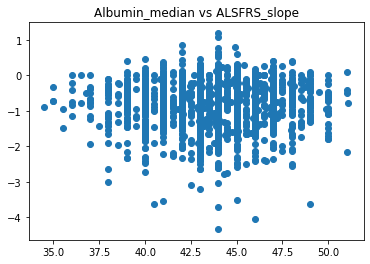

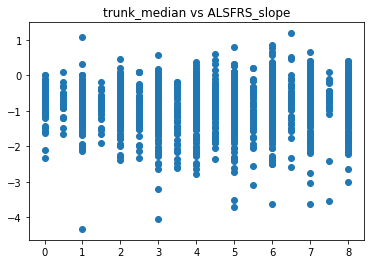

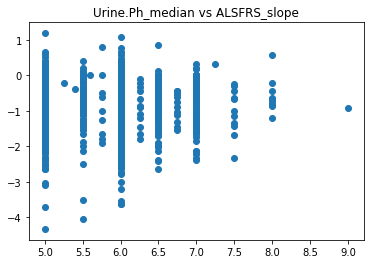

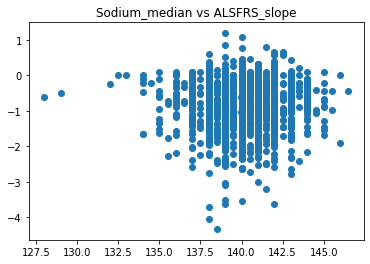

In [4]:
plt.title('Albumin_median vs ALSFRS_slope')
plt.scatter(dftr.Albumin_median,dftr.ALSFRS_slope)
plt.show()
plt.title('trunk_median vs ALSFRS_slope')
plt.scatter(dftr.trunk_median,dftr.ALSFRS_slope)
plt.show()
plt.title('Urine.Ph_median vs ALSFRS_slope')
plt.scatter(dftr['Urine.Ph_median'],dftr.ALSFRS_slope)
plt.show()
plt.title('Sodium_median vs ALSFRS_slope')
plt.scatter(dftr['Sodium_median'],dftr.ALSFRS_slope)
plt.show()

SELECT THE FEATURES

In [5]:
import numpy as np
print('Correlation:\n',dftr.corr(method='pearson'))

Correlation:
                        ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  \
ID               1.000000  0.007008    -0.014141       -0.011243    -0.009921   
Age_mean         0.007008  1.000000    -0.276195       -0.349024    -0.297121   
Albumin_max     -0.014141 -0.276195     1.000000        0.780141     0.596662   
Albumin_median  -0.011243 -0.349024     0.780141        1.000000     0.761269   
Albumin_min     -0.009921 -0.297121     0.596662        0.761269     1.000000   
...                   ...       ...          ...             ...          ...   
trunk_min        0.015915  0.065092     0.042903        0.072317     0.134409   
trunk_range     -0.000649  0.036559    -0.064183       -0.088370    -0.114685   
Urine.Ph_max    -0.022561 -0.001532     0.075413        0.056894     0.034555   
Urine.Ph_median -0.016045  0.002561    -0.046885       -0.042497    -0.001877   
Urine.Ph_min     0.002042 -0.008615    -0.138430       -0.118506    -0.049783   

             

In [6]:
import seaborn as sns
corln=dftr.corr(method='pearson')
plt.figure(figsize=(10,5))
#sns.heatmap(corln,cmap='Blues',annot=True)
print('\nCorrelation of "ALSFRS_slope" with other Parameters in descending order\n\n',corln.ALSFRS_slope.sort_values(ascending=False))


Correlation of "ALSFRS_slope" with other Parameters in descending order

 ALSFRS_slope          1.000000
ALSFRS_Total_min      0.601810
trunk_min             0.488530
mouth_min             0.435538
hands_min             0.424107
                        ...   
mouth_range          -0.553194
leg_range            -0.584507
hands_range          -0.632350
trunk_range          -0.686407
ALSFRS_Total_range   -0.819305
Name: ALSFRS_slope, Length: 101, dtype: float64


<Figure size 720x360 with 0 Axes>

In [7]:
xy=dftr.iloc[:,[3,6]]
xy

,Albumin_median,ALSFRS_slope
0,40.5,-0.965608
1,41.0,-0.921717
2,47.0,-0.914787
3,44.0,-0.598361
4,45.5,-0.444039
...,...,...
2218,49.0,-0.239501
2219,45.0,-0.388711
2220,44.0,-0.108631
2221,44.0,-0.855880


In [8]:
k=KMeans(3) #or k=KMeans(n_clusters=3)

In [9]:
k.fit(xy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
clusterclass=k.fit_predict(xy)
clusterclass

array([1, 1, 2, ..., 0, 0, 0])

In [11]:
dftr['cluster']=clusterclass
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0,1
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0,1
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0,2
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0,0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0,2
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0,0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0,0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0,0


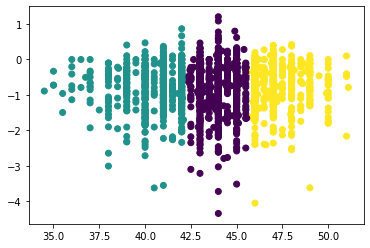

In [12]:
plt.scatter(dftr.Albumin_median, dftr.ALSFRS_slope,c=dftr.cluster)#,cmap='rainbow')
#here c is color as many as in cluster group
#cmap is colormap

In [14]:
wcss=[] #witnin cluster sum of squares
k_range=range(1,10)
for i in k_range: #for k in range(1,10)
    k=KMeans(i)
    k.fit(xy)
    wcss_iter=k.inertia_
    wcss.append(wcss_iter)
wcss

[16521.185020848203,
 6696.570906613342,
 3612.985845928442,
 2644.6084170994072,
 2017.3944653367275,
 1656.8235098356115,
 1436.2859447284914,
 1257.1728109876483,
 1131.708134074116]

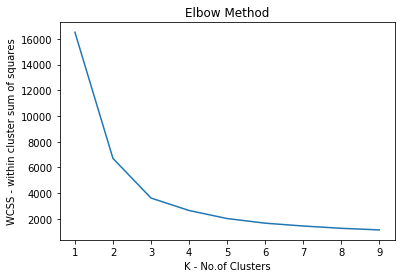

In [15]:
plt.title('Elbow Method') #to find the optimum K value
plt.xlabel('K - No.of Clusters')
plt.ylabel('WCSS - within cluster sum of squares')
plt.plot(k_range,wcss)

standardisation

In [16]:
from sklearn import preprocessing
scaled=preprocessing.scale(xy)
scaled


array([[-1.30078105, -0.38145034],
       [-1.11240084, -0.31090704],
       [ 1.14816173, -0.29976862],
       ...,
       [ 0.01788044,  0.99590769],
       [ 0.01788044, -0.20509208],
       [ 0.39464087, -2.12521742]])

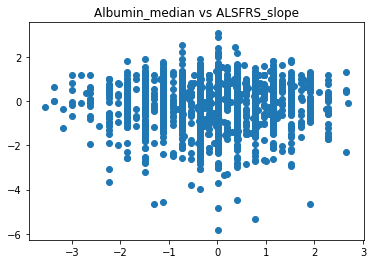

In [23]:
plt.title('Albumin_median vs ALSFRS_slope')
plt.scatter(scaled[:,0], scaled[:,1])
plt.show()

In [24]:
wcss=[]
for i in range(1,10):
    k=KMeans(i)
    k.fit(scaled)
    wcss_iter=k.inertia_
    wcss.append(wcss_iter)
wcss

[4446.000000000001,
 2925.567622540491,
 1956.3018323687043,
 1556.6217736192239,
 1275.1595330531945,
 1081.0562428586945,
 929.915659746898,
 837.5218798307471,
 757.6243768582209]

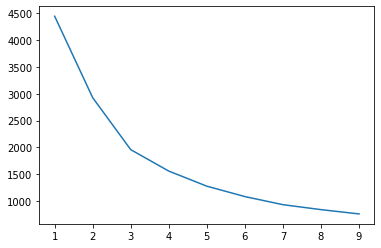

In [25]:
plt.plot(k_range,wcss)

In [19]:
k_scaled=KMeans(3)
k_scaled.fit(scaled)
cluster=k_scaled.fit_predict(scaled)
cluster
dftr['scaled_cluster']=cluster
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster,scaled_cluster
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,533,8,7.0,7,0.002646,6.00,6.0,6.0,1,2
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,649,8,7.0,5,0.005386,7.00,5.0,5.0,1,2
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,1234,5,0.0,0,0.008929,6.00,5.0,5.0,2,0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,2492,5,5.0,3,0.004988,7.00,6.0,5.0,0,0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,2956,6,4.0,1,0.008489,6.00,5.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,997136,7,5.0,5,0.003643,7.00,6.0,5.0,2,0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,998047,5,4.0,3,0.003630,7.41,5.5,5.0,0,0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,998773,5,4.0,4,0.001825,9.00,6.0,5.0,0,0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,998908,8,4.5,2,0.010714,6.00,5.0,5.0,0,0


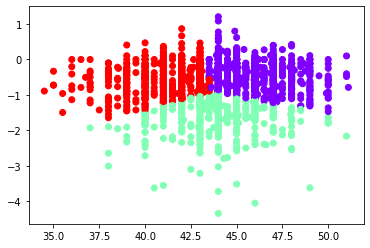

In [20]:
plt.scatter(dftr.Albumin_median, dftr.ALSFRS_slope,c=dftr.scaled_cluster,cmap='rainbow')

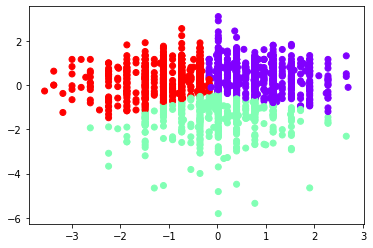

In [26]:
plt.scatter(scaled[:,0], scaled[:,1],c=dftr.scaled_cluster,cmap='rainbow')

In [27]:
k_scaled.cluster_centers_

array([[ 0.68038071,  0.4476268 ],
       [-0.01291699, -1.43374651],
       [-1.02980336,  0.31953908]])

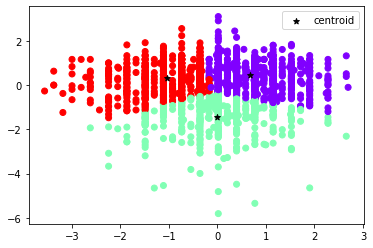

In [22]:
plt.scatter(scaled[:,0], scaled[:,1],c=dftr.scaled_cluster,cmap='rainbow')
plt.scatter(k_scaled.cluster_centers_[:,0],k_scaled.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()